<a href="https://colab.research.google.com/github/Azarbaad/Manufacturing/blob/main/Simulate_production_sensor_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detected anomalies represent abnormal machine behavior which could indicate early equipment failure, material issues, or process drift. Embedding such analytics into production monitoring tools enables proactive intervention

In [2]:
import pandas as pd
import numpy as np
import os

np.random.seed(42)

# Create timestamps
timestamps = pd.date_range(
    start="2024-01-01",
    periods=10000,
    freq="1min"
)

# Simulate sensors
data = pd.DataFrame({
    "timestamp": timestamps,
    "temperature": np.random.normal(70, 2, len(timestamps)),
    "pressure": np.random.normal(30, 1, len(timestamps)),
    "vibration": np.random.normal(0.02, 0.005, len(timestamps)),
    "cycle_time": np.random.normal(45, 3, len(timestamps))
})

# Inject anomalies (simulating machine issues)
anomaly_indices = np.random.choice(len(data), size=100, replace=False)
data.loc[anomaly_indices, "temperature"] += np.random.normal(15, 5, 100)
data.loc[anomaly_indices, "vibration"] += np.random.normal(0.05, 0.01, 100)

# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)
data.to_csv("data/sensor_data.csv", index=False)

In [4]:
sensor_df = pd.read_csv('data/sensor_data.csv')
display(sensor_df.head())

,timestamp,temperature,pressure,vibration,cycle_time
0,2024-01-01 00:00:00,70.993428,29.321505,0.021741,39.058284
1,2024-01-01 00:01:00,69.723471,29.694501,0.021417,41.835043
2,2024-01-01 00:02:00,71.295377,29.402619,0.015317,43.238915
3,2024-01-01 00:03:00,73.046060,30.110418,0.022898,45.449007
4,2024-01-01 00:04:00,69.531693,31.197179,0.012550,48.072487


In [5]:
def preprocess(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index("timestamp")
    df = df.sort_index()
    return df


In [6]:
from sklearn.ensemble import IsolationForest

def detect_anomalies(df):
    model = IsolationForest(
        contamination=0.01,
        random_state=42
    )

    features = df[["temperature", "pressure", "vibration", "cycle_time"]]
    df["anomaly"] = model.fit_predict(features)

    # -1 = anomaly, 1 = normal
    df["anomaly"] = df["anomaly"].map({1: 0, -1: 1})
    return df


# Task
Explain the `detect_anomalies` function, including the Isolation Forest algorithm, its parameters, the features used for detection, and how anomalies are identified and mapped (0 for normal, 1 for anomalous). Describe the expected output of the `detect_anomalies` function, which is the original DataFrame with an added 'anomaly' column indicating whether each data point is normal (0) or anomalous (1).

## Explain Anomaly Detection Code

### Subtask:
Explain the `detect_anomalies` function, including the Isolation Forest algorithm, its parameters, the features used for detection, and how anomalies are identified and mapped (0 for normal, 1 for anomalous).


The `detect_anomalies` function leverages the **Isolation Forest algorithm** (an efficient, unsupervised machine learning algorithm for anomaly detection) to identify outliers in the sensor data. Isolation Forest operates on the principle of isolating anomalies rather than profiling normal data. It works by recursively partitioning the data by randomly selecting a feature and then a split value for that feature. Anomalies, being few and different, are typically isolated with fewer partitions (closer to the root of the decision tree), while normal observations require more partitions to be isolated.

### Parameters:
*   **`contamination=0.01`**: This parameter specifies the expected proportion of outliers in the dataset. Setting it to 0.01 indicates that the model is expected to find approximately 1% of the data points as anomalies.
*   **`random_state=42`**: This ensures the reproducibility of the model's results. If the model is run multiple times with the same `random_state`, it will produce the same output.

### Features Used for Detection:
The model uses the following sensor readings as features for anomaly detection:
*   `temperature`
*   `pressure`
*   `vibration`
*   `cycle_time`

These features are relevant because significant deviations or unusual patterns in any of these parameters can indicate a machine malfunction or an operational issue, making them strong indicators of an anomaly.

### Anomaly Identification and Mapping:
The `model.fit_predict(features)` method assigns an anomaly score to each data point. It returns:
*   `-1` for anomalous data points (outliers)
*   `1` for normal data points (inliers)

Subsequently, the function maps these predictions to a new 'anomaly' column:
*   `-1` (anomalies) are remapped to `1`
*   `1` (normal data) are remapped to `0`

This mapping provides a clear, binary indicator where `1` signifies an anomaly and `0` signifies a normal observation.

## Describe Expected Result

### Subtask:
Describe the expected output of the `detect_anomalies` function, which is the original DataFrame with an added 'anomaly' column indicating whether each data point is normal (0) or anomalous (1).


### Expected Output of `detect_anomalies` function

The `detect_anomalies` function will return a Pandas DataFrame that is an extension of the original input DataFrame. This output DataFrame will have the following characteristics:

1.  **Structure**: It will retain all original columns present in the input DataFrame, which include 'timestamp', 'temperature', 'pressure', 'vibration', and 'cycle_time'.
2.  **New Column**: A new column named 'anomaly' will be added to the DataFrame.
3.  **Anomaly Values**: This new 'anomaly' column will contain binary values:
    *   `0`: Indicates that the corresponding data point is classified as **normal** by the Isolation Forest model.
    *   `1`: Indicates that the corresponding data point is classified as **anomalous** by the Isolation Forest model.
4.  **Purpose**: The 'anomaly' column serves as a direct, binary indicator of the anomaly detection results, making it easy to identify which data points are flagged as unusual based on the features ('temperature', 'pressure', 'vibration', 'cycle_time') used by the Isolation Forest algorithm.

## Final Task

### Subtask:
Summarize the explanation of the anomaly detection code and its results.


## Summary:

### Q&A
*   **Explanation of `detect_anomalies` function:**
    The `detect_anomalies` function utilizes the Isolation Forest algorithm to identify outliers. This algorithm isolates anomalies by requiring fewer partitions compared to normal data points. Key parameters include `contamination=0.01`, expecting 1% of the data to be anomalous, and `random_state=42` for reproducibility. The detection relies on `temperature`, `pressure`, `vibration`, and `cycle_time` as features. The model's output of -1 for anomalies and 1 for normal data is remapped to 1 for anomalies and 0 for normal observations.
*   **Expected output of `detect_anomalies` function:**
    The function is expected to return the original input DataFrame with an additional column named 'anomaly'. This 'anomaly' column will contain binary values: `0` indicating a normal data point and `1` indicating an anomalous data point, providing a clear indicator of the detection results.

### Data Analysis Key Findings
*   The `detect_anomalies` function employs the **Isolation Forest algorithm** to identify outliers based on the principle that anomalies are more easily isolated through random partitioning.
*   The algorithm's `contamination` parameter is set to `0.01`, indicating an expectation that approximately 1% of the dataset will consist of anomalies.
*   The `random_state` parameter is fixed at `42` to ensure the reproducibility of the anomaly detection results.
*   Anomaly detection is performed using four key sensor readings: `temperature`, `pressure`, `vibration`, and `cycle_time`.
*   The `model.fit_predict` method initially outputs `-1` for anomalous points and `1` for normal points; these are subsequently remapped to `1` and `0` respectively, in the new 'anomaly' column for clarity.
*   The expected output is the original DataFrame augmented with an 'anomaly' column, where `0` signifies a normal data point and `1` signifies an anomalous data point.

### Insights or Next Steps
*   The function provides a clear and interpretable binary flag for anomalies, which is essential for subsequent analysis, visualization, or alert generation.
*   The next logical step is to execute this function on the actual dataset to identify and further investigate the flagged anomalies.


# Task
Detect and visualize anomalies in the `sensor_df` from "data/sensor_data.csv" by applying the `preprocess` function, then the `detect_anomalies` function, and finally generating a plot to visualize the detected anomalies, summarizing the visualization.

## Preprocess Data

### Subtask:
Apply the `preprocess` function to `sensor_df` to convert the 'timestamp' column to datetime objects and set it as the index.


**Reasoning**:
Apply the `preprocess` function to `sensor_df` to convert the 'timestamp' column to datetime objects and set it as the index, then display the head of the resulting DataFrame.



In [7]:
preprocessed_df = preprocess(sensor_df)
display(preprocessed_df.head())

,temperature,pressure,vibration,cycle_time
timestamp,,,,
2024-01-01 00:00:00,70.993428,29.321505,0.021741,39.058284
2024-01-01 00:01:00,69.723471,29.694501,0.021417,41.835043
2024-01-01 00:02:00,71.295377,29.402619,0.015317,43.238915
2024-01-01 00:03:00,73.046060,30.110418,0.022898,45.449007
2024-01-01 00:04:00,69.531693,31.197179,0.012550,48.072487


## Detect Anomalies

### Subtask:
Apply the `detect_anomalies` function to the preprocessed DataFrame to identify anomalies and add an 'anomaly' column.


**Reasoning**:
Apply the `detect_anomalies` function to the `preprocessed_df` to identify anomalies and add the 'anomaly' column, then display the head of the resulting DataFrame.



In [8]:
anomalies_df = detect_anomalies(preprocessed_df)
display(anomalies_df.head())

,temperature,pressure,vibration,cycle_time,anomaly
timestamp,,,,,
2024-01-01 00:00:00,70.993428,29.321505,0.021741,39.058284,0
2024-01-01 00:01:00,69.723471,29.694501,0.021417,41.835043,0
2024-01-01 00:02:00,71.295377,29.402619,0.015317,43.238915,0
2024-01-01 00:03:00,73.046060,30.110418,0.022898,45.449007,0
2024-01-01 00:04:00,69.531693,31.197179,0.012550,48.072487,0


## Visualize Anomalies

### Subtask:
Generate a plot to visualize the detected anomalies. A scatter plot of sensor readings (e.g., 'temperature' or 'vibration') against time, with anomalous points highlighted in a different color, would be effective. Ensure to include legends.


**Reasoning**:
First, I'll import the necessary libraries, `matplotlib.pyplot` for plotting and `seaborn` for enhanced visualizations, to prepare for creating the anomaly plot.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
To visualize the anomalies, I will create a scatter plot of 'temperature' over time. Normal data points will be plotted in one color, and anomalous points will be highlighted in a distinct color and larger marker size, as specified in the instructions. This will involve filtering the `anomalies_df` based on the 'anomaly' column.



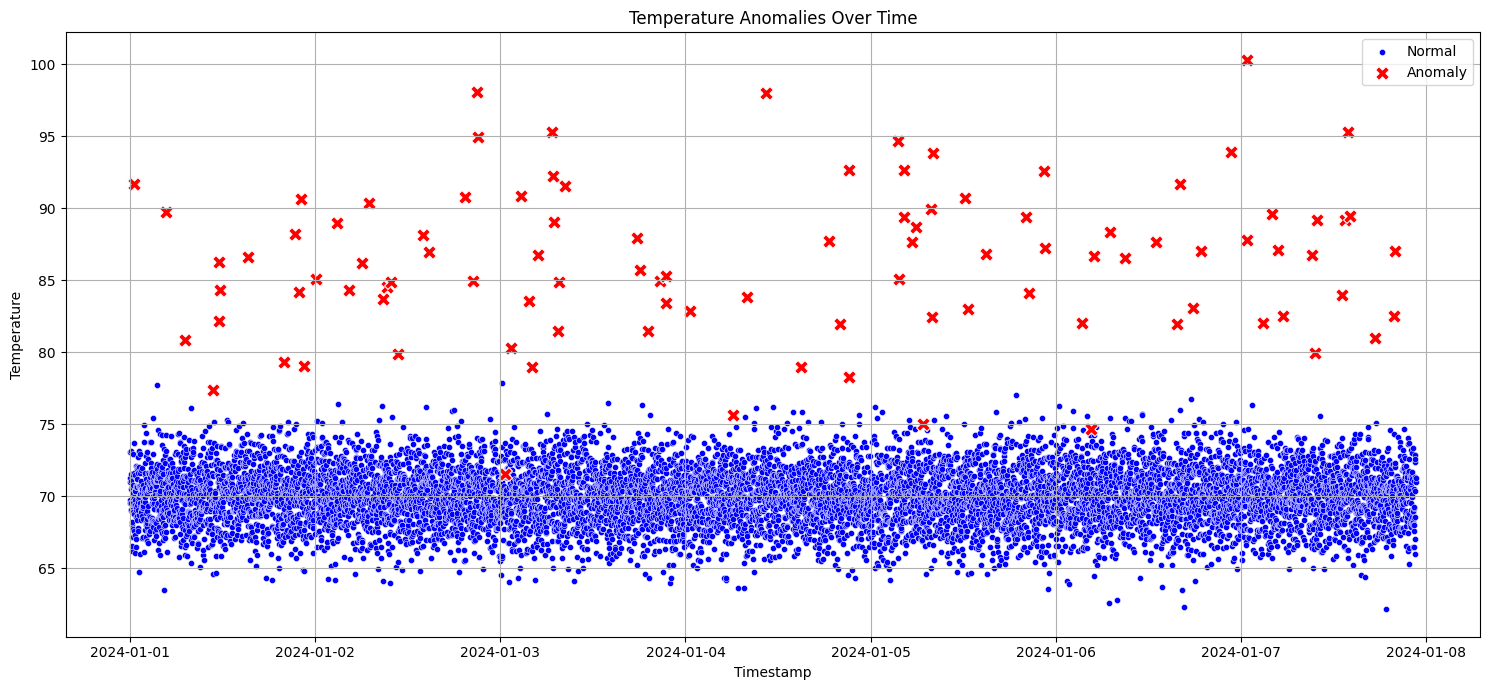

In [10]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x=anomalies_df[anomalies_df['anomaly'] == 0].index,
    y=anomalies_df[anomalies_df['anomaly'] == 0]['temperature'],
    label='Normal',
    color='blue',
    s=20
)
sns.scatterplot(
    x=anomalies_df[anomalies_df['anomaly'] == 1].index,
    y=anomalies_df[anomalies_df['anomaly'] == 1]['temperature'],
    label='Anomaly',
    color='red',
    s=100,
    marker='X'
)

plt.title('Temperature Anomalies Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the visualization of the anomalies.


## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing:** The 'timestamp' column in the `sensor_df` was successfully converted to datetime objects and set as the DataFrame's index.
*   **Anomaly Detection:** The `detect_anomalies` function was applied, resulting in a new `anomalies_df` which includes an 'anomaly' column. This column clearly flags data points as '0' for normal or '1' for anomalous.
*   **Anomaly Visualization:** A scatter plot was generated to effectively visualize temperature anomalies over time. Normal data points were plotted in blue, while detected anomalous points were distinctly highlighted in red with 'X' markers, making them easily identifiable within the time series.

### Insights or Next Steps

*   The visualization clearly shows distinct points flagged as anomalies, suggesting specific instances where temperature readings deviated significantly from the norm. Further investigation into the root causes of these particular anomalies could be beneficial for maintenance or operational adjustments.
*   Explore incorporating other sensor features (e.g., 'vibration') into the anomaly detection model or visualizing anomalies across multiple dimensions to identify multivariate anomalies.
